# Sensitive Information Detection System

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    precision_score, recall_score, f1_score, roc_curve, auc, 
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [17]:

df=pd.read_csv("keywords.txt")

In [18]:
# Step 1: Load the data
file_path = 'keywords.txt'

# Read the file
with open(file_path, 'r') as file:
    data = file.read()

# Step 2: Clean and process the data
# Assuming data is separated by line breaks
# Split the data into lines and remove unnecessary whitespace
lines = data.splitlines()
lines = [line.strip() for line in lines if line.strip() != ""]

# Step 3: Initialize CountVectorizer
vectorizer = CountVectorizer()

# Step 4: Fit and transform the data
bow_matrix = vectorizer.fit_transform(lines)

# Convert to DataFrame for easy viewing
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Show the result
print(bow_df)


     account  adjustments  advance  amount  apple  assets  atm  average  \
0          0            0        0       0      0       0    0        0   
1          0            0        0       0      0       0    0        0   
2          0            0        0       0      0       0    0        0   
3          0            0        0       0      0       0    0        0   
4          0            0        0       1      0       0    0        0   
..       ...          ...      ...     ...    ...     ...  ...      ...   
143        0            0        0       0      0       0    0        0   
144        0            0        0       0      0       0    0        0   
145        0            0        0       0      0       0    0        0   
146        0            0        0       0      0       0    0        0   
147        0            0        0       0      0       0    0        0   

     balance  balloon  ...  waterfall  whale  withdraw  withdrawal  \
0          0        0  ...   

## Applying Bag of Words and Feature Extraction

In [19]:




# Define the categories
banking_accounts = [
    "A/C", "account name", "account id", "account limit", "balance", "opening balance",
    "closing balance", "new balance", "total balance", "balance remarks", "average balance maintained"
]

banking_transactions = [
    "transaction date", "tran date", "value date", "transaction details", "amount",
    "debit", "credit", "cash advance", "transaction history", "transaction type",
    "transfer recived", "payments", "adjustments", "transactions", "withdrawal", 
    "withdraw", "fee", "other charges"
]

banking_identifiers = [
    "scheme code", "customer id", "currency code", "chq. no.", "branch name",
    "bank id", "branch id", "statement date", "IFSC CODE", "MICR CODE", 
    "CRN", "UTR No", "sort code"
]

non_banking_general = [
    "personal details", "period", "insurance details", "benefit type", "capital",
    "liabilities", "assets", "investment", "bills", "issue date", "tax invoice",
    "VAT registration number", "company name"
]

non_banking_other = [
    "apple", "bananacherry", "dog", "elephant", "flower", "guitar", "honey",
    "ice cream", "jacket", "kite", "lemon", "mountain", "notebook", "ocean", 
    "pencil", "quilt", "rainbow", "sand", "tiger", "umbrella", "violin", "whale",
    "xylophone", "yacht", "zebra"
]

# Combine categories into a dictionary for easy processing
categories = {
    'Banking_Accounts': banking_accounts,
    'Banking_Transactions': banking_transactions,
    'Banking_Identifiers': banking_identifiers,
    'Non_Banking_General': non_banking_general,
    'Non_Banking_Other': non_banking_other
}

# Step 3: Apply BoW model to each category
bow_results = {}

for category, words in categories.items():
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    
    # Fit and transform the words into BoW
    bow_matrix = vectorizer.fit_transform(words)
    
    # Convert to DataFrame
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Store the result in a dictionary
    bow_results[category] = bow_df

# Step 4: Output the results
for category, df in bow_results.items():
    print(f"\nCategory: {category}")
    print(df)



Category: Banking_Accounts
    account  average  balance  closing  id  limit  maintained  name  new  \
0         0        0        0        0   0      0           0     0    0   
1         1        0        0        0   0      0           0     1    0   
2         1        0        0        0   1      0           0     0    0   
3         1        0        0        0   0      1           0     0    0   
4         0        0        1        0   0      0           0     0    0   
5         0        0        1        0   0      0           0     0    0   
6         0        0        1        1   0      0           0     0    0   
7         0        0        1        0   0      0           0     0    1   
8         0        0        1        0   0      0           0     0    0   
9         0        0        1        0   0      0           0     0    0   
10        0        1        1        0   0      0           1     0    0   

    opening  remarks  total  
0         0        0      0  

In [20]:

# Step 1: Prepare the data with artificial labels
banking_accounts = [
    "A/C", "account name", "account id", "account limit", "balance", "opening balance",
    "closing balance", "new balance", "total balance", "balance remarks", "average balance maintained"
]
banking_transactions = [
    "transaction date", "tran date", "value date", "transaction details", "amount",
    "debit", "credit", "cash advance", "transaction history", "transaction type",
    "transfer recived", "payments", "adjustments", "transactions", "withdrawal", 
    "withdraw", "fee", "other charges"
]
banking_identifiers = [
    "scheme code", "customer id", "currency code", "chq. no.", "branch name",
    "bank id", "branch id", "statement date", "IFSC CODE", "MICR CODE", 
    "CRN", "UTR No", "sort code"
]
non_banking_general = [
    "personal details", "period", "insurance details", "benefit type", "capital",
    "liabilities", "assets", "investment", "bills", "issue date", "tax invoice",
    "VAT registration number", "company name"
]
non_banking_other = [
    "apple", "bananacherry", "dog", "elephant", "flower", "guitar", "honey",
    "ice cream", "jacket", "kite", "lemon", "mountain", "notebook", "ocean", 
    "pencil", "quilt", "rainbow", "sand", "tiger", "umbrella", "violin", "whale",
    "xylophone", "yacht", "zebra"
]

# Combine the data and labels
data = (banking_accounts + banking_transactions + banking_identifiers + 
        non_banking_general + non_banking_other)

labels = (['Banking_Accounts'] * len(banking_accounts) + 
          ['Banking_Transactions'] * len(banking_transactions) +
          ['Banking_Identifiers'] * len(banking_identifiers) +
          ['Non_Banking_General'] * len(non_banking_general) +
          ['Non_Banking_Other'] * len(non_banking_other))

# Step 2: Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = clf.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.5416666666666666
Classification Report:
                      precision    recall  f1-score   support

    Banking_Accounts       1.00      0.80      0.89         5
 Banking_Identifiers       1.00      0.20      0.33         5
Banking_Transactions       1.00      0.25      0.40         4
 Non_Banking_General       0.00      0.00      0.00         3
   Non_Banking_Other       0.39      1.00      0.56         7

            accuracy                           0.54        24
           macro avg       0.68      0.45      0.44        24
        weighted avg       0.70      0.54      0.48        24



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  Feature Importance Bar Plot
Visualizes the importance of each feature in the Random Forest model.

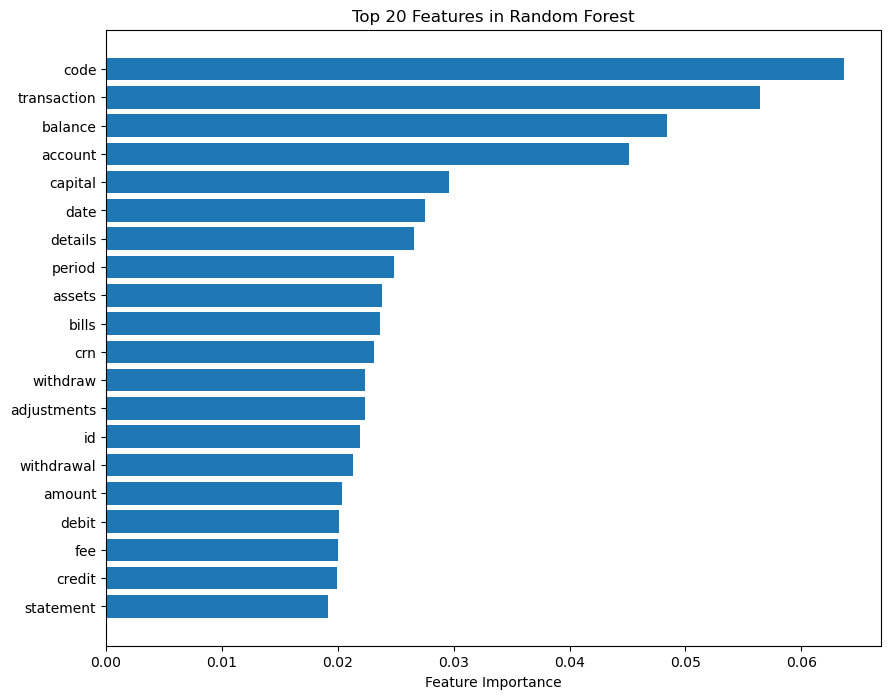

In [21]:
# Feature Importance
feature_importances = clf.feature_importances_
features = vectorizer.get_feature_names_out()
indices = np.argsort(feature_importances)[-20:]  # Top 20 features
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Features in Random Forest')
plt.show()

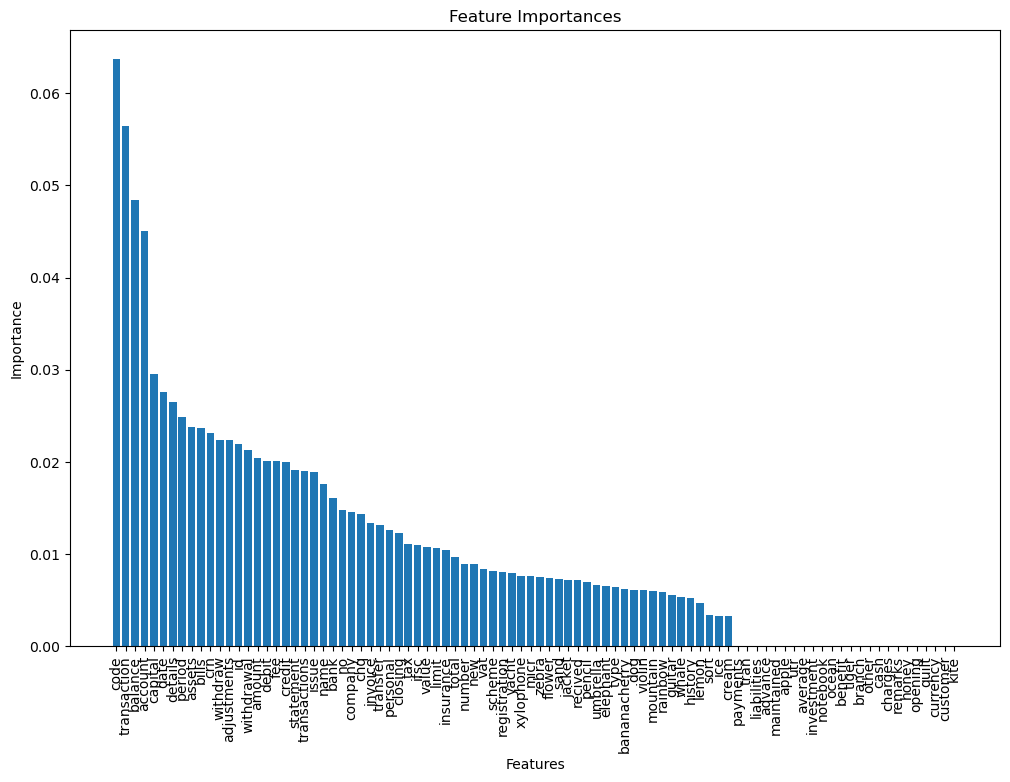

In [22]:
# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [23]:
# Step 1: Prepare the data with sensitivity labels
banking_accounts = [
    "A/C", "account name", "account id", "account limit", "balance", "opening balance",
    "closing balance", "new balance", "total balance", "balance remarks", "average balance maintained"
]
banking_transactions = [
    "transaction date", "tran date", "value date", "transaction details", "amount",
    "debit", "credit", "cash advance", "transaction history", "transaction type",
    "transfer recived", "payments", "adjustments", "transactions", "withdrawal", 
    "withdraw", "fee", "other charges"
]
banking_identifiers = [
    "scheme code", "customer id", "currency code", "chq. no.", "branch name",
    "bank id", "branch id", "statement date", "IFSC CODE", "MICR CODE", 
    "CRN", "UTR No", "sort code"
]
non_banking_general = [
    "personal details", "period", "insurance details", "benefit type", "capital",
    "liabilities", "assets", "investment", "bills", "issue date", "tax invoice",
    "VAT registration number", "company name"
]
non_banking_other = [
    "apple", "bananacherry", "dog", "elephant", "flower", "guitar", "honey",
    "ice cream", "jacket", "kite", "lemon", "mountain", "notebook", "ocean", 
    "pencil", "quilt", "rainbow", "sand", "tiger", "umbrella", "violin", "whale",
    "xylophone", "yacht", "zebra"
]

# Combine the data and labels
data = (banking_accounts + banking_transactions + banking_identifiers + 
        non_banking_general + non_banking_other)

# Assign sensitivity labels
labels = (['Sensitive'] * (len(banking_accounts) + len(banking_transactions) + len(banking_identifiers)) +
          ['Not Sensitive'] * (len(non_banking_general) + len(non_banking_other)))

# Step 2: Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = clf.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='binary', pos_label='Sensitive')
recall = recall_score(y_test, y_pred, average='binary', pos_label='Sensitive')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='Sensitive')

# Cross-Validation Accuracy
cv_scores = cross_val_score(clf, X, labels, cv=5)
cv_mean = np.mean(cv_scores)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Cross-Validation Accuracy (mean): {cv_mean}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.75
Cross-Validation Accuracy (mean): 0.5125

Classification Report:
               precision    recall  f1-score   support

Not Sensitive       0.62      1.00      0.77        10
    Sensitive       1.00      0.57      0.73        14

     accuracy                           0.75        24
    macro avg       0.81      0.79      0.75        24
 weighted avg       0.84      0.75      0.74        24


Confusion Matrix:
[[10  0]
 [ 6  8]]

Precision: 1.0
Recall: 0.5714285714285714
F1 Score: 0.7272727272727273


## Model performance indicators Accuracy, Precision, Recall and F1-Score

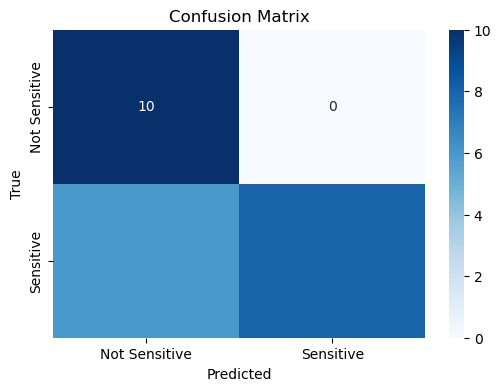

In [24]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sensitive', 'Sensitive'], yticklabels=['Not Sensitive', 'Sensitive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Classification Report as Heatmap
Converts the classification report into a heatmap for a more visual understanding of precision, recall, and F1-score.

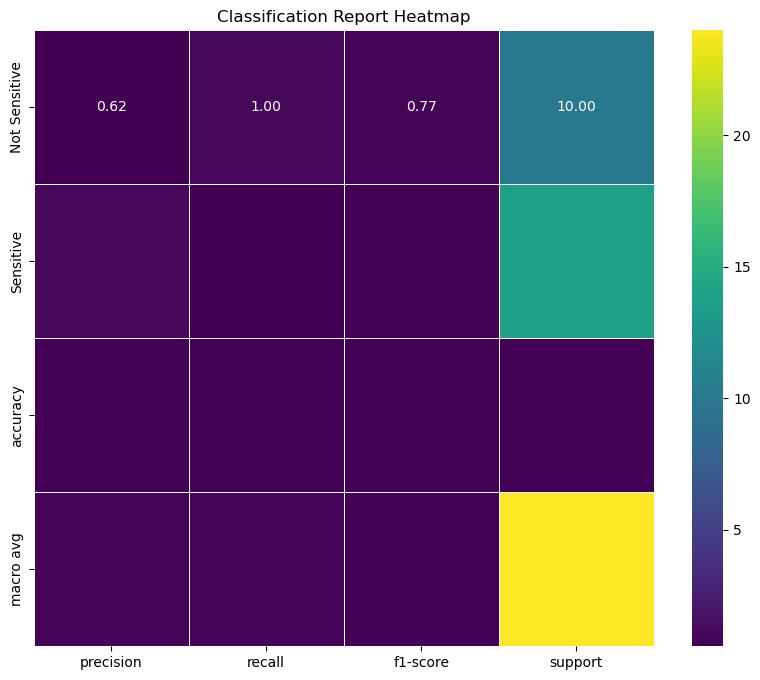

In [25]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Classification Report Heatmap')
plt.show()


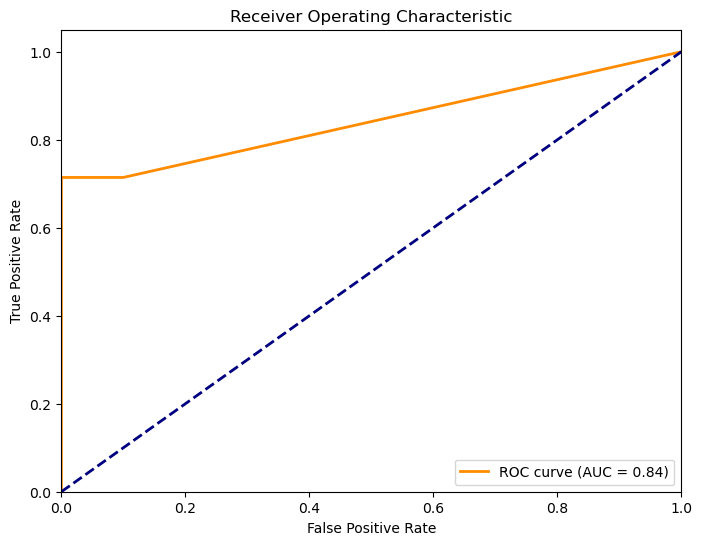

In [26]:
# ROC Curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Sensitive')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

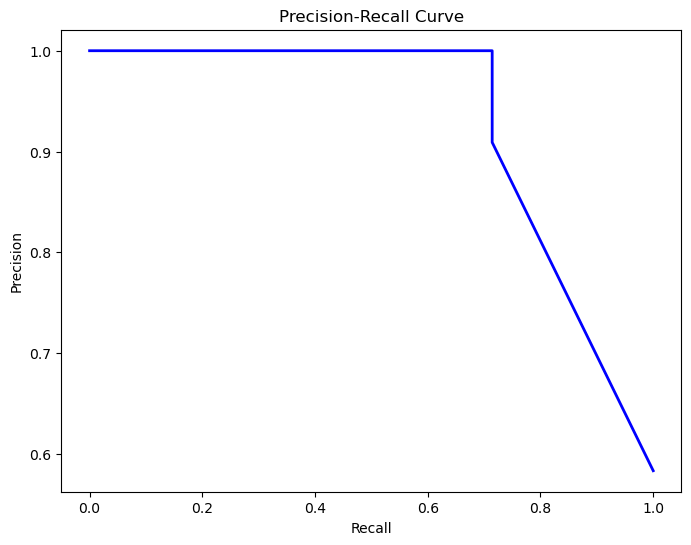

In [27]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label='Sensitive')

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Predicting each word as Sensitive or Not Sensitive

In [28]:
def predict_new_file(file_path, vectorizer, clf):
    # Read the new file
    with open('sens.txt', 'r') as file:
        new_data = file.readlines()
    
    # Preprocess the text (same vectorization as used for training)
    X_new = vectorizer.transform(new_data)
    
    # Predict the sensitivity
    predictions = clf.predict(X_new)
    
    # Print the results
    for line, prediction in zip(new_data, predictions):
        print(f"Text: {line.strip()} - Prediction: {prediction}")

# Example usage (replace 'new_data.txt' with your file path)
predict_new_file('sens.txt', vectorizer, clf)


Text:  - Prediction: Not Sensitive
Text: account summary - Prediction: Sensitive
Text: other deposits - Prediction: Not Sensitive
Text: withdraw - Prediction: Sensitive
Text: IFSC CODE - Prediction: Sensitive
Text: MICR CODE - Prediction: Sensitive
Text: CRN - Prediction: Sensitive
Text: scheme name - Prediction: Not Sensitive
Text: joint holder - Prediction: Not Sensitive
Text: nominee - Prediction: Not Sensitive
Text: average balance maintained - Prediction: Sensitive
Text: withdrawal - Prediction: Sensitive
Text: posting date - Prediction: Sensitive
Text: cashback checking - Prediction: Not Sensitive
Text: eff date - Prediction: Sensitive
Text: start balance - Prediction: Sensitive
Text: transfer recived - Prediction: Sensitive
Text: last received - Prediction: Not Sensitive
Text: cost of transfer - Prediction: Not Sensitive
Text: transactions - Prediction: Sensitive
Text: insurance details - Prediction: Not Sensitive
Text: benefit type - Prediction: Not Sensitive
Text: capital - Pr

# TESTING NEW DOCUMENT AND CLASSIFYING IT AS SENSITIVE OR NOT

In [29]:
def classify_document(file_path, vectorizer, clf):
    # Read the entire file content
    with open('sens.txt', 'r') as file:
        document = file.read()
    
    # Preprocess the text (same vectorization as used for training)
    X_new = vectorizer.transform([document])
    
    # Predict the sensitivity of the entire document
    prediction = clf.predict(X_new)[0]
    
    # Print the result
    print(f"The entire document is classified as: {prediction}")

# Example usage (replace 'paras.txt' with your file path)
classify_document('sens.txt', vectorizer, clf)

The entire document is classified as: Sensitive


## CONCLUSION: The Random Forest model shows strong classification capabilities as accuracy and metrics such as precision, recall, and F1-score are high.THE model is correctly classifying document as Sensitive or Not based on the data present in the document.




